# 1. Load and visualize dataset (optional PCA for 2D view).

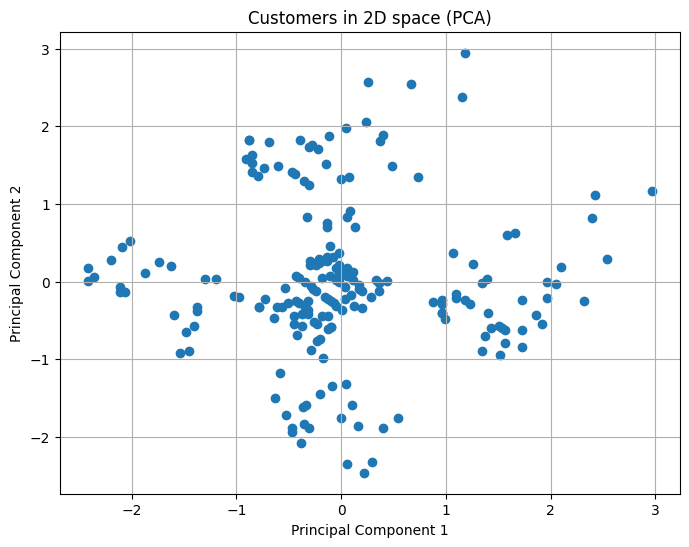

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
data = pd.read_csv("Mall_Customers.csv")
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("Customers in 2D space (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# 2. Fit K-Means and assign cluster labels.

In [3]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.labels_
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


# 3. Use the Elbow Method to find optimal K.

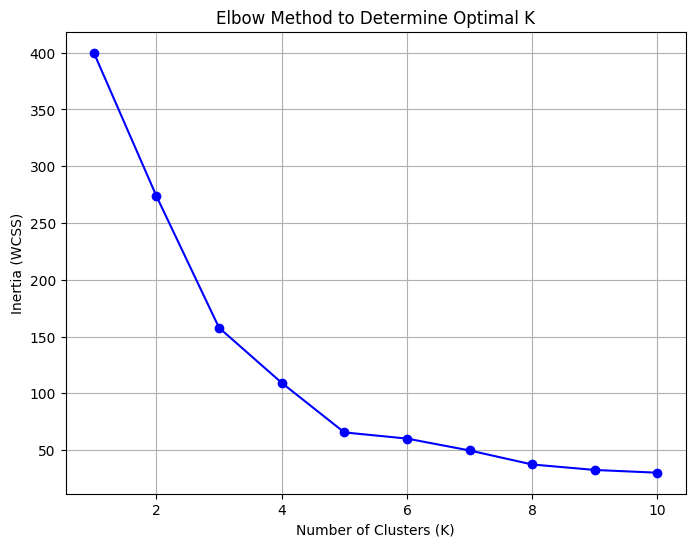

In [4]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method to Determine Optimal K")
plt.grid(True)
plt.show()

# 4. Visualize clusters with color-coding.

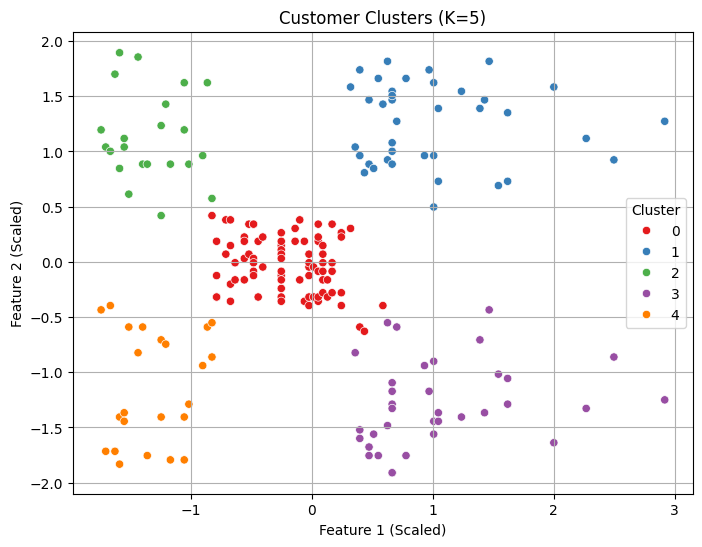

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_scaled[:, 0],
    y=X_scaled[:, 1],
    hue=data['Cluster'],
    palette='Set1',
    legend='full'
)
plt.title("Customer Clusters (K=5)")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.grid(True)
plt.show()

# 5. Evaluate clustering using Silhouette Score.

In [7]:
score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score for K=5: {score:.4f}")

Silhouette Score for K=5: 0.5547
